In [1]:
import numpy as np
import matplotlib.pyplot as plt
import slugger as slug
import pandas as pd

params = {'text.usetex': False, 'mathtext.fontset': 'stix'}
plt.rcParams.update(params)
%matplotlib inline

In [2]:
rk3 = pd.read_csv('./rk3.csv', index_col=0)
sf3 = pd.read_csv('./sf3.csv', index_col=0)
pif = pd.read_csv('./pif.csv', index_col=0)



NN = np.array(rk3.index)

a = np.float64(sf3.index[3])
b = sf3["dens"][a]

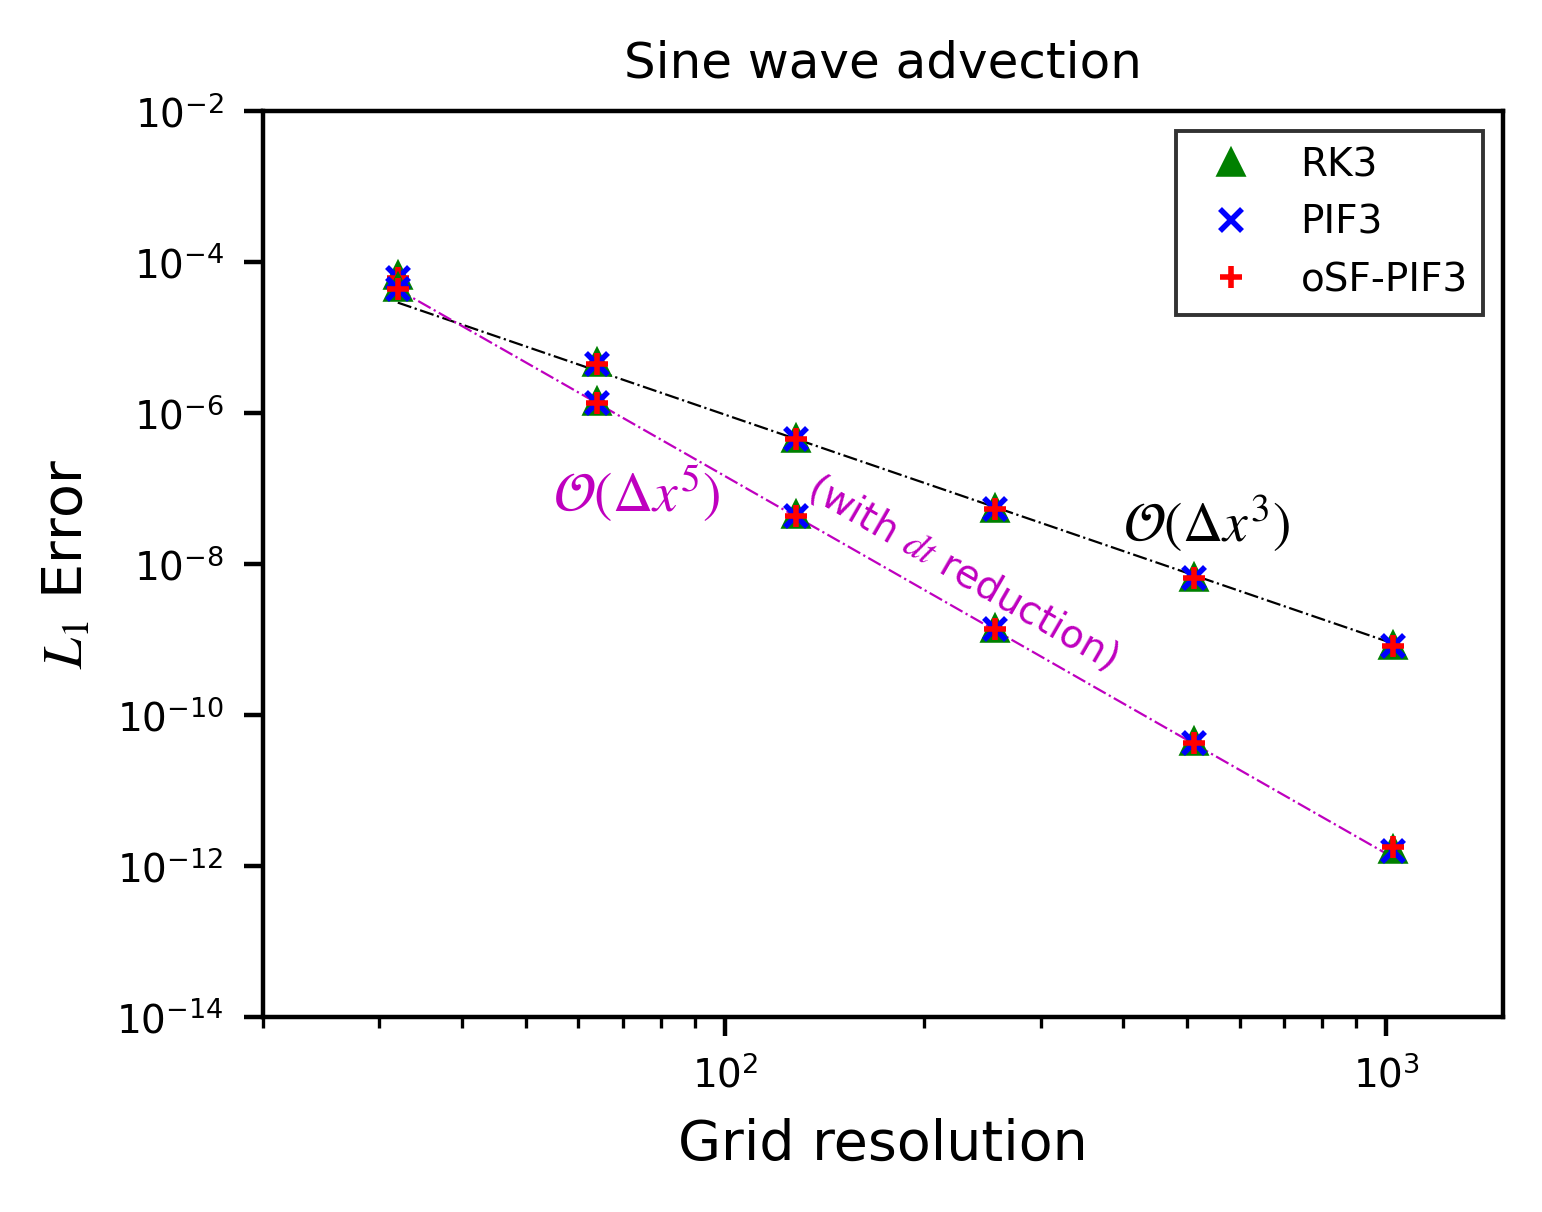

In [6]:
rk3_dt = pd.read_csv('./dt_reduction/rk3.csv', index_col=0)
sf3_dt = pd.read_csv('./dt_reduction/sf3.csv', index_col=0)
pif_dt = pd.read_csv('./dt_reduction/pif.csv', index_col=0)


fig = plt.figure(figsize=(4,3), dpi=400)
ax = fig.add_subplot(1,1,1)

a = np.float64(sf3.index[2])
b = sf3["dens"][a]
ax.plot(NN, (b*a**3)*(NN)**(-3.), 'k-.', linewidth=0.4)
ax.annotate(r'$\mathcal{O} (\Delta x^{3})$', xy=(4.E2,2.E-8))

a = np.float64(sf3_dt.index[1])
b = sf3_dt["dens"][a]
ax.plot(NN, (b*a**5)*(NN)**(-5.), 'm-.', linewidth=0.4)
ax.annotate(r'$\mathcal{O} (\Delta x^{5})$', xy=(5.5E1,5.E-8), color='m')
ax.annotate(r'(with $dt$ reduction)', xy=(1.3E2,4.E-10), rotation=-30, color='m', size=7)


ax.plot(rk3['dens'], 'g^', markersize=4, linewidth=0.5, label='RK3')
ax.plot(pif['dens'], 'bx', markersize=4, linewidth=0.5, label='PIF3')
ax.plot(sf3['dens'], 'r+', markersize=4, linewidth=0.5, label='oSF-PIF3')

ax.plot(rk3_dt['dens'], 'g^', markersize=4, linewidth=0.5, label='_nolegend_')
ax.plot(pif_dt['dens'], 'bx', markersize=4, linewidth=0.5, label='_nolegend_')
ax.plot(sf3_dt['dens'], 'r+', markersize=4, linewidth=0.5, label='_nolegend_')



ax.loglog()

ax.set_xlim(2.E1, 1.5E3)
ax.set_ylim(1.E-14, 1.E-2)

legend = ax.legend(fontsize=7, numpoints=1, fancybox=False, edgecolor='k')
legend.get_frame().set_linewidth(.7)

ax.tick_params(axis='both', which='major', labelsize=7)
ax.set_title('Sine wave advection', fontsize=9)

ax.set_xlabel('Grid resolution')
ax.set_ylabel(r'$L_1$' + ' Error')



fig.savefig('./sine_over_dtReduction.pdf', bbox_inches='tight', pad_inches=0.15)